<a href="https://colab.research.google.com/github/viliturpeinen/Colabs/blob/main/TEHTAVA5_KOE27112025_PAATOKSENTEKOMALLIT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import pandas as pd

# Parametrit

fixed_costs = 86000

# Jakautumat ja oletukset

sales_mean = 12000
sales_std = 2100

price_min = 180
price_max = 260

unit_cost_mean = 105
unit_cost_std = 18

iterations = 10000

# Monte Carlo -simulaatio

np.random.seed(42)  # toistettavuus

# Myyntimäärä (normaali)

sales = np.random.normal(sales_mean, sales_std, iterations)
sales = np.round(np.clip(sales, 0, None))  # ei negatiivisia

# Yksikköhinta (tasainen)

price = np.random.uniform(price_min, price_max, iterations)

# Yksikkökustannus (normaali)

unit_cost = np.random.normal(unit_cost_mean, unit_cost_std, iterations)
unit_cost = np.clip(unit_cost, 0, None)  # ei negatiivisia

# Nettotuotto

net_profit = sales * (price - unit_cost) - fixed_costs

# Tulokset

df = pd.DataFrame({
"Sales": sales,
"Price": price,
"UnitCost": unit_cost,
"NetProfit": net_profit
})

# Yhteenveto

summary = df["NetProfit"].describe(percentiles=[0.05, 0.25, 0.5, 0.75, 0.95])
print(summary)


count    1.000000e+04
mean     1.300721e+06
std      4.293234e+05
min      2.080962e+05
5%       6.466617e+05
25%      9.932612e+05
50%      1.271695e+06
75%      1.583137e+06
95%      2.047710e+06
max      3.086365e+06
Name: NetProfit, dtype: float64


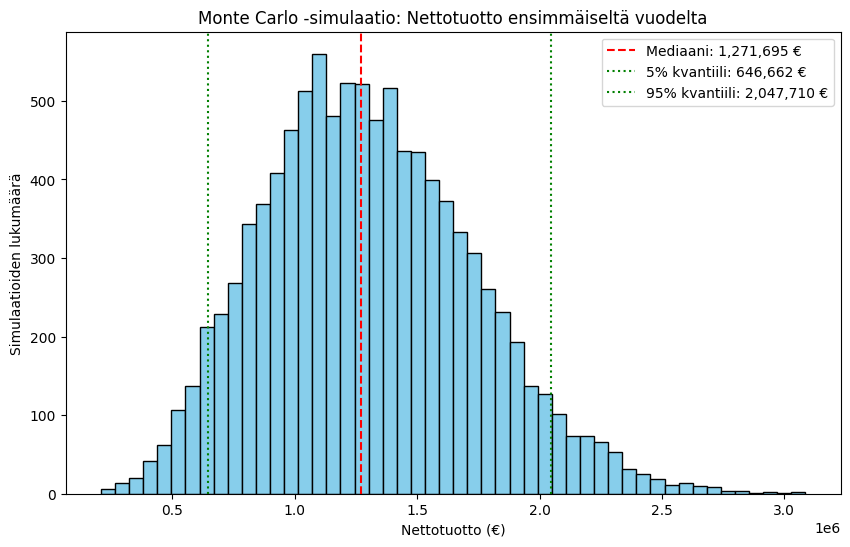

In [3]:
import matplotlib.pyplot as plt

# Histogrammi nettotuotosta

plt.figure(figsize=(10,6))
plt.hist(df["NetProfit"], bins=50, color='skyblue', edgecolor='black')
plt.title("Monte Carlo -simulaatio: Nettotuotto ensimmäiseltä vuodelta")
plt.xlabel("Nettotuotto (€)")
plt.ylabel("Simulaatioiden lukumäärä")

# Lisätään pystysuorat viivat mediaanille ja 5%-95% kvantiileille

median = df["NetProfit"].median()
p05 = df["NetProfit"].quantile(0.05)
p95 = df["NetProfit"].quantile(0.95)

plt.axvline(median, color='red', linestyle='--', label=f'Mediaani: {median:,.0f} €')
plt.axvline(p05, color='green', linestyle=':', label=f'5% kvantiili: {p05:,.0f} €')
plt.axvline(p95, color='green', linestyle=':', label=f'95% kvantiili: {p95:,.0f} €')

plt.legend()
plt.show()
